<a href="https://colab.research.google.com/github/gaciaza2015/CuerpoNegro/blob/main/DCI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
year = 1                                                                 #Cambiar año y ejecutar todo 0 <- 2015, 1<- 2016... etc 
auxy = [2015,2016,2017,2018,2019]
data = [0 for i in range(len(auxy))]                                                               
for i in range(len(auxy)):
  data[i] = pd.read_csv("drive/MyDrive/Colab Notebooks/570486_21_17_-101_70_"+str(auxy[i])+".csv",skiprows = 2,usecols=np.arange(0,8,1))   
data[year].head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI
0,2016,1,1,0,30,0,0,0
1,2016,1,1,1,30,0,0,0
2,2016,1,1,2,30,0,0,0
3,2016,1,1,3,30,0,0,0
4,2016,1,1,4,30,0,0,0


In [3]:
def ansuz(dat):
    tempDHI,tempDNI,tempGHI,tempFD,tempIC = [[] for i in range(12)],[[] for i in range(12)],[[] for i in range(12)],[0 for i in range(12)],[0 for i in range(12)] 
    for i in range(12):
        temp = dat[dat.Month == i+1]
        for j in range(24):
            aux = temp[temp.Hour==j]
            tempDHI[i].append(np.average(aux.DHI))
            tempDNI[i].append(np.average(aux.DNI))
            tempGHI[i].append(np.average(aux.GHI))
        tempFD[i] = np.nan_to_num((np.array(tempDHI[i])/np.array(tempGHI[i])))
        tempIC[i] = np.nan_to_num((np.array(tempGHI[i])/np.array(tempDNI[i])))
    return tempDHI,tempDNI,tempGHI,tempFD,tempIC

In [ ]:
DHI,DNI,GHI,FrDif,IndCla = [0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))] 
for i in range(len(auxy)):
  DHI[i],DNI[i],GHI[i],FrDif[i],IndCla[i] = ansuz(data[i].copy())             #promedia datos por hora al mes, ignora warnings, es por los nan

**A partir de aquí solo son cosas para graficar.**

In [5]:
#Esto solo son cosas para las gráficas
month = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
         "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
mark = [".","X","o","v","8","s","p","P","*","+","x","d"]

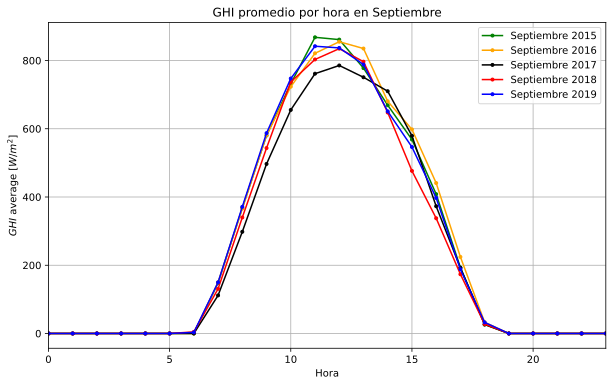

In [6]:
#Gráfica de ejemplo, cambia datos o mes según se requiera
mes = 9
datos = GHI
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(np.arange(0,len(datos[0][mes-1]),1),datos[0][mes-1],marker = ".",color="green",label = " ".join((month[mes-1],"2015")))
plt.plot(np.arange(0,len(datos[1][mes-1]),1),datos[1][mes-1],marker = ".",color="orange",label = " ".join((month[mes-1],"2016")))
plt.plot(np.arange(0,len(datos[2][mes-1]),1),datos[2][mes-1],marker = ".",color="black",label = " ".join((month[mes-1],"2017")))
plt.plot(np.arange(0,len(datos[3][mes-1]),1),datos[3][mes-1],marker = ".",color="red",label = " ".join((month[mes-1],"2018")))
plt.plot(np.arange(0,len(datos[4][mes-1]),1),datos[4][mes-1],marker = ".",color="blue",label = " ".join((month[mes-1],"2019")))
plt.legend()
plt.title("".join(("GHI"," promedio por hora en ",month[mes-1])),loc='center')
plt.xlabel('Hora')
plt.ylabel('$GHI$ average [$W/m^2$]')
plt.xlim([0,23])
plt.grid()

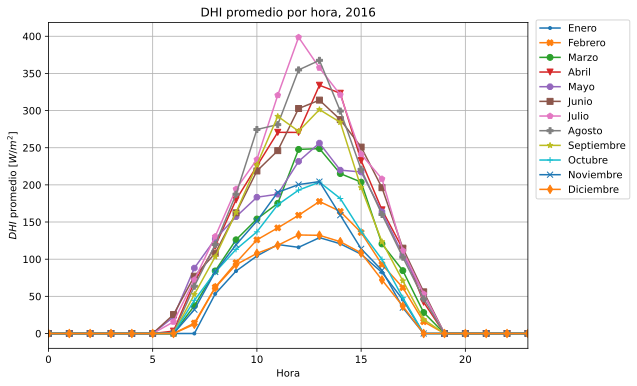

In [7]:
#DHI
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(0,len(DHI[year][i]),1),DHI[year][i],marker = mark[i], label = month[i])
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("DHI promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$DHI$ promedio [$W/m^2$]')
plt.xlim([0,23])
plt.grid()

Text(0, 0.5, '$DHI$ promedio [$W/m^2$]')

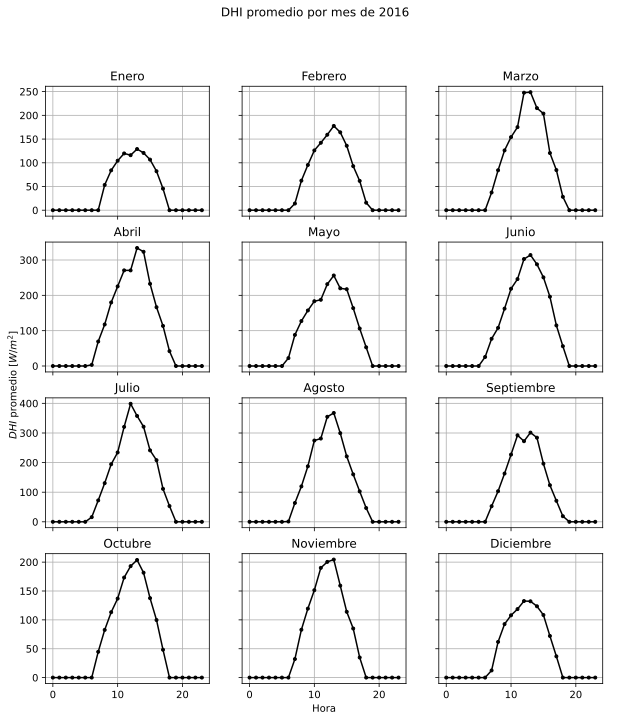

In [8]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
k = 0
fig.suptitle(" ".join(('DHI promedio por mes de',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(0,len(DHI[year][k]),1),DHI[year][k],marker = ".",color = "Black")
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$DHI$ promedio [$W/m^2$]')

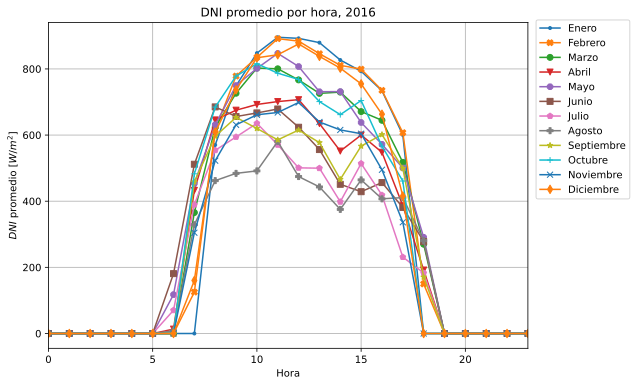

In [9]:
#DNI
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(0,len(DNI[year][i]),1),DNI[year][i],marker = mark[i], label = month[i])
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("DNI promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$DNI$ promedio [$W/m^2$]')
plt.xlim([0,23])
plt.grid()

Text(0, 0.5, '$DNI$ promedio [$W/m^2$]')

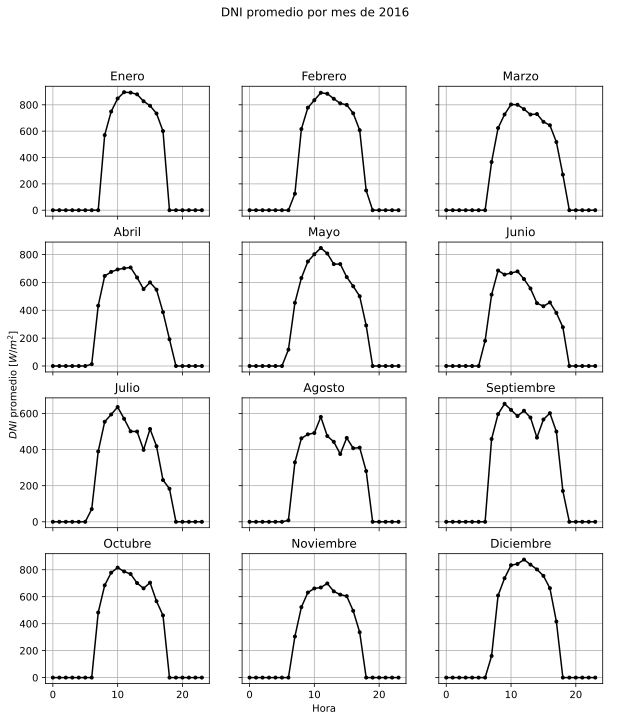

In [10]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
k = 0
fig.suptitle(" ".join(('DNI promedio por mes de',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(0,len(DNI[year][k]),1),DNI[year][k],marker = ".",color = "Black")
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$DNI$ promedio [$W/m^2$]')

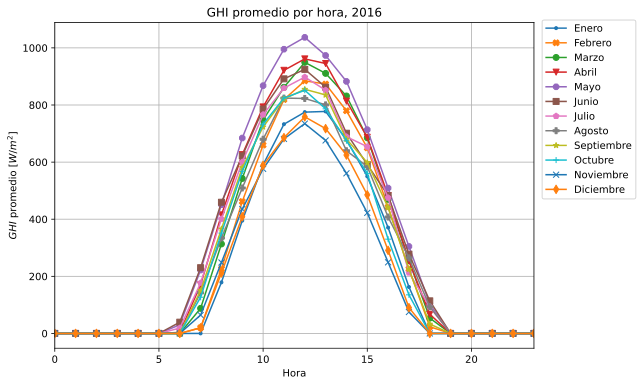

In [11]:
#GHI
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(0,len(GHI[year][i]),1),GHI[year][i],marker = mark[i], label = month[i])
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("GHI promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')
plt.xlim([0,23])
plt.grid()

Text(0, 0.5, '$GHI$ promedio [$W/m^2$]')

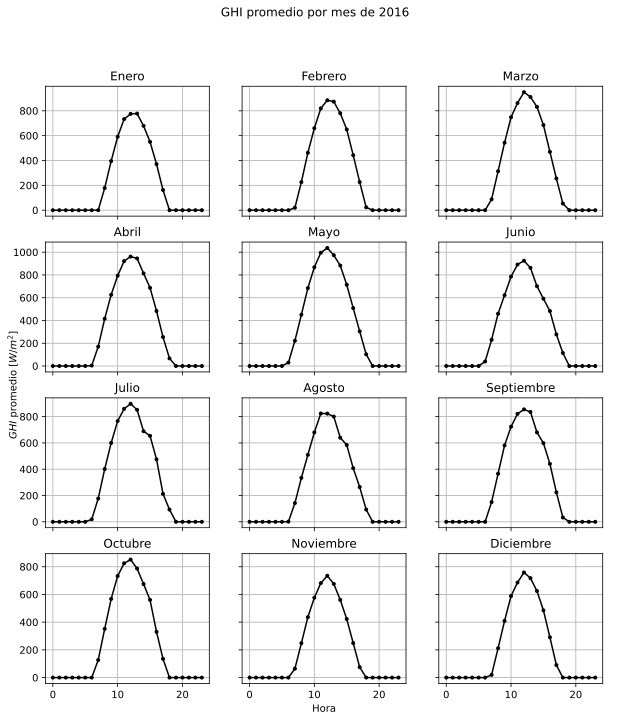

In [12]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
k = 0
fig.suptitle(" ".join(('GHI promedio por mes de',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(0,len(GHI[year][k]),1),GHI[year][k],marker = ".",color = "Black")
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')

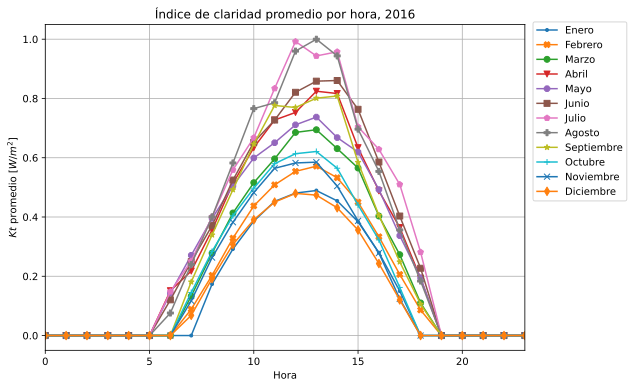

In [13]:
#Índice de claridad
plt.rcParams['figure.figsize'] = (8.6,6)
mx = np.amax(np.array(IndCla[year]))                                            #Normalizado respecto al pico del año (No sé si es correcto)
for i in range(12):
    plt.plot(np.arange(0,len(IndCla[year][i]),1),IndCla[year][i]/mx,marker = mark[i], label = month[i])
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("Índice de claridad promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$Kt$ promedio [$W/m^2$]')
plt.xlim([0,23])
plt.grid()

Text(0, 0.5, '$Kt$ promedio [$W/m^2$]')

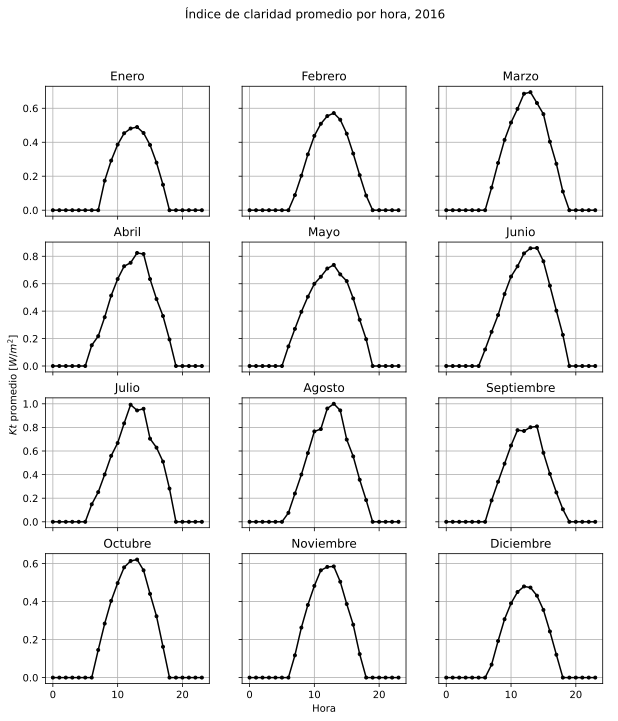

In [14]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
k = 0
fig.suptitle(" ".join(('Índice de claridad promedio por hora,',str(auxy[year]))))
mx = np.amax(np.array(IndCla[year]))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(0,24,1),IndCla[year][k]/mx,marker = ".",color = "Black")
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$Kt$ promedio [$W/m^2$]')

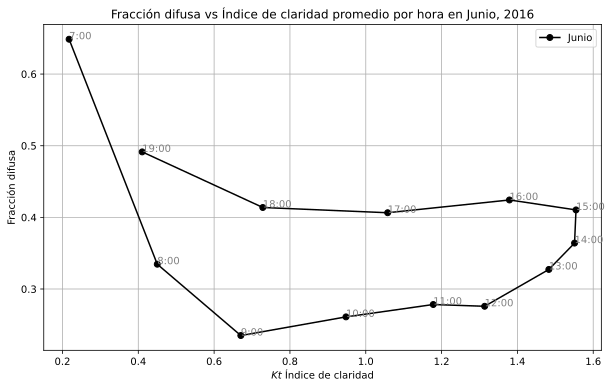

In [15]:
#Índice de claridad vs Fracción difusa. (No grafico los ceros)
mes = 6
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(np.ma.masked_equal(IndCla[year][mes-1],0),np.ma.masked_equal(FrDif[year][mes-1],0),marker = "o", label = month[mes-1],color = "Black")
plt.legend()
plt.title("".join(("Fracción difusa vs Índice de claridad promedio por hora en ",month[mes-1],", ",str(auxy[year]))),loc='center')
plt.xlabel('$Kt$ Índice de claridad')
plt.ylabel('Fracción difusa')
plt.grid()
nn = np.arange(1,25,1)
g = np.ma.masked_equal(IndCla[year][mes-1],0).mask
for i, txt in enumerate(nn):
  if g[i] == False:
    plt.annotate("".join((str(txt),":00")), (IndCla[year][mes-1][i],FrDif[year][mes-1][i]),xycoords = 'data',color="gray")

Text(0, 0.5, 'Fracción Difusa')

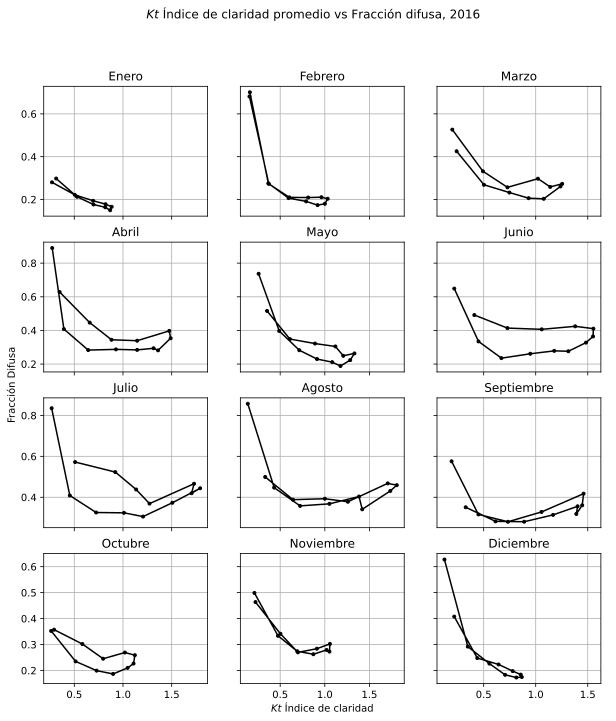

In [16]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
k = 0
fig.suptitle(" ".join(('$Kt$ Índice de claridad promedio vs Fracción difusa,',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.ma.masked_equal(IndCla[year][k],0),np.ma.masked_equal(FrDif[year][k],0),marker = ".",color = "Black")
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none',axis = 'both', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('$Kt$ Índice de claridad')
plt.ylabel('Fracción Difusa')